## Homework15
   **截止日期：**<font color=ff0000>**5.6(周五)晚** </font>
   <br>**注：**本次作业中附加题最多加1分。

### 利用ARMA进行建模


利用 ARMA 模型进行平稳序列的预测，计算对应的 MSE 误差

如果采用 AIC 或者 BIC 选择阶数，可以使用 statsmodels.tsa.stattools 里面的 arma_order_select_ic 函数来选取，用法如下

order = statsmodels.tsa.stattools.arma_order_select_ic(X, max_ar=10, max_ma=10, ic=['aic', 'bic'])

其中 max_ar 和 max_ma 表示最大选取的AR模型的阶数以及 MA 模型的阶数

ARMA 模型的使用方式大致如下

1. fit 模型 model = ARMA(data, order=(AR_p, MA_q)).fit() AR_p代表 AR部分的阶数， MA_q 代表 MA 部分的阶数
2. 预测模型 可以获得 对应模型的参数 coef =  model.params 其中前 AR_p + 1个表示 AR模型部分的参数， 后面 MA_q 个参数为 MA 模型的参数，也可以直接使用 ARMA 模型中的 predict 函数：pred = model.predict(start=start_index, end=end_index)
  

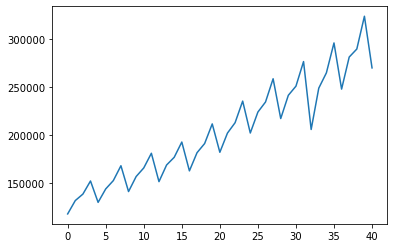

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_excel('./HW14/GDP.xls')
data = np.array(df.iloc[:,2:3])

# TODO
data = np.reshape(data, 41)
plt.plot(data)


In [2]:
import warnings
import statsmodels.tsa.stattools as st
import statsmodels.api as stm

warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA', FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA', FutureWarning)
order = st.arma_order_select_ic(data, ic=['aic', 'bic'])

D:\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hes

In [3]:
order.aic_min_order, order.bic_min_order

((4, 2), (4, 2))

D:\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


[ 2.04342088e+05  3.04439025e-01  1.11161528e-01 -1.36415367e-01
  7.13229169e-01]


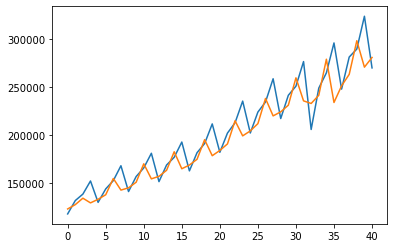

In [4]:
model = stm.tsa.ARMA(data, order=(4, 0)).fit()
coef = model.params
print(coef)
plt.plot(data)
plt.plot(model.predict(start=1, end=41))

In [14]:
mse = np.abs(data-model.predict(start=1, end=41))
mse = np.sum(mse**2)
mse

17481775101.022224

### 使用前向算法，根据目前的观测序列，求当前天气的概率

In [23]:
states = ('Rainy', 'Sunny')
 
observations = ('walk', 'shop', 'clean')
 
start_probability = {'Rainy': 0.6, 'Sunny': 0.4}
 
transition_probability = {
   'Rainy' : {'Rainy': 0.7, 'Sunny': 0.3},
   'Sunny' : {'Rainy': 0.4, 'Sunny': 0.6},
   }
 
emission_probability = {
   'Rainy' : {'walk': 0.1, 'shop': 0.4, 'clean': 0.5},
   'Sunny' : {'walk': 0.6, 'shop': 0.3, 'clean': 0.1},
   }

# TODO
import copy
prob = list()
prob.append(copy.deepcopy(start_probability))
for i in range(3):
   obs = observations[i]
   prob_r = (transition_probability['Rainy']['Rainy']*prob[i]['Rainy'] \
      +transition_probability['Sunny']['Rainy']*prob[i]['Sunny']) \
      *emission_probability['Rainy'][obs]
   prob_s = (transition_probability['Rainy']['Sunny']*prob[i]['Rainy'] \
      +transition_probability['Sunny']['Sunny']*prob[i]['Sunny']) \
      *emission_probability['Sunny'][obs]
   prob.append({'Rainy': prob_r/(prob_r+prob_s), 'Sunny': prob_s/(prob_r+prob_s)})
print(prob[3])

{'Rainy': 0.8634206606703692, 'Sunny': 0.1365793393296309}


### （附加）使用维特比算法，根据目前的观测序列，推测这三天的天气

In [50]:
# TODO
maxT = 3
sigma = list()
sigma.append({'Rainy': start_probability['Rainy']*emission_probability['Rainy'][observations[0]], \
    'Sunny': start_probability['Sunny']*emission_probability['Sunny'][observations[0]]})
path = list()
path.append({'Rainy': '', 'Sunny': ''})
for k in range(len(observations)-1):
    sigma.append({})
    path.append({})
    obs = observations[k+1]
    for j in states:
        cur_proba = 0
        for i in states:
            proba = sigma[k][i]*transition_probability[i][j]*emission_probability[j][obs]
            if proba > cur_proba:
                cur_proba = proba
                tmppath = i
        sigma[k+1][j] = cur_proba
        path[k+1][j] = tmppath
x_pred = 'Rainy'
if sigma[maxT-1]['Rainy'] < sigma[maxT-1]['Sunny']:
    x_pred = 'Sunny'
print("max prob:", sigma[2][x_pred])
max_path = [x_pred]
while maxT > 0:
    maxT -= 1
    max_path.append(path[maxT][max_path[len(max_path)-1]])
max_path.reverse()
print(max_path[1:])

max prob: 0.01344
['Sunny', 'Rainy', 'Rainy']
